### Correlation dimension's code

Here i'll develope a code to calculate the N dimensional atractor's correlation dimension. Some usefull notes:

$$ C(r) = \frac{2}{N(N-1)} \sum_{j=1}^N \sum_{i=j+1}^N \Theta (r - r_{ij} ) $$

where $\Theta (r - r_{ij})$ is the *Heaviside function* defined as:

$$ \Theta (x) = \left\{\begin{array}{l}0 \ \ \ para  \ x < 0\\1 \ \ \ para \ x \ge 0 \end{array}\right. $$

and $r_{ij}$ is the distance between two points. 

Our correlation dimension will be the plot's slope of $ log \ C_r $ vs $ log \ r $


$$ D_2 = \lim_{r\to 0} \lim_{N \to \infty} \frac{d log(C(r))}{d log(r)} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

%matplotlib notebook

First i define the basic functions i will use

In [13]:
#--- Heaviside Function
def Heaviside(x):
    if x<0:
        return 0
    elif x>=0:
        return 1
    
#--- N dimensional distance 
def distn(x1, x2, dim):
    
    dist = 0
    for i in range(0, dim):
        diff = (x1[i] - x2[i])**2
        dist += diff
        
    return np.sqrt(dist)

#--- Ode solutions after trascient 
def sol_tras(f, y0, params, t, dt):
    
    tras_state = odeint(f, y0, t, args=params)
    state0 = tras_state[-1,:]
    tt = np.arange( t[-1], 2*t[-1], dt)
    state = odeint(f, state0, tt, args=params) 
    
    return state

The correlation function.
- N is the number of points you want to use in the calculation
- n the atractor's topological dimension
- r is the distances choosen according to the system
- Data is the solution itself

In [4]:
#--- each C_r
def C_r(r, Data, n, N):
    
    tot_sum = 0
    for i in range(0, N):
        for j in range(i+1, N):
            
            r_ij = distn(Data[:,i], Data[:,j], n)
            xev = r - r_ij
            tot_sum += Heaviside(xev)
        #print(tot_sum, i)
    Cr = 2*tot_sum / (N*(N-1))
    
    return Cr

#---- all C_r depending on r
def Total_C_r(dat, R, N, dim):
    
    tot_C_r = []
    for r in R:
        curr = C_r(r, dat, dim, N)
        tot_C_r.append(curr)
        
    return tot_C_r

Aplying this method to some known dynamical systems

In [5]:
#---- Henon's Map
def Henon_map(n, a, b):
    x=[0.5*(1-b)]; y=[0.5*(1-b)]
    
    for i in range(1, n):
        xi = 1 - a*x[-1]**2 + y[-1]
        yi = b*x[-1]
        x.append(xi)
        y.append(yi)
        
    return x, y  

#---- Lorentz' system
def Lorentz_eq2(r, t, rho, sigma, beta): #Atractor de Lorentz
    x, y, z = r
    
    dx = sigma*(y-x)
    dy = x*(rho-z) -y
    dz = x*y - beta*z
    
    return np.array([dx, dy, dz])

Henon's Map correlation dimension using the new algorithm. Note that this is a discrete map, so the numerical solver will not be used 

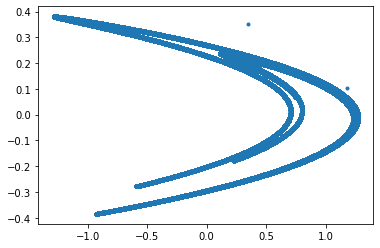

In [6]:
#---- 1 million points Henon's Map
x_H, y_H = Henon_map(int(1e6), 1.4, 0.3)

plt.plot(x_H, y_H, '.')

In [14]:
Henon = np.array((x_H, y_H))
dim_H = 2
#--- first set r manually
r_H = np.arange(0.01, 1.0, 0.01)

#--- set number of points N
N_H = 100

#--- Calculate C_r
Henon_Cr = Total_C_r(Henon, r_H, N_H, dim_H)

la dimensión de correlación será:  1.2350871395373977


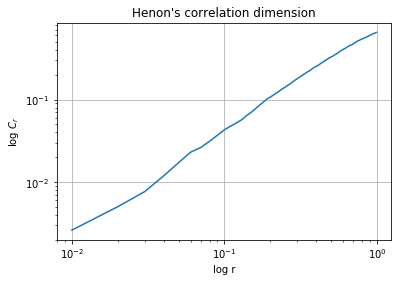

In [15]:
#--- Plot the resulting curve and fit
coef_H = np.polyfit(np.log(r_H), np.log(Henon_Cr), 1)
print("la dimensión de correlación será: ", coef_H[0])


plt.loglog(r_H, Henon_Cr)
plt.ylabel(r'log $C_r$')
plt.xlabel("log r")
plt.title("Henon's correlation dimension")
plt.grid()
plt.show()

To verify the nth dimensional code, i am going to calculate the lorentz' system correlation dimension

In [9]:
#--- Solving the differential equations in the transcient 
dt_L = 0.01
p_L = (28, 10, 8./3.)
t_L = np.arange(0, 100, dt_L)
y0_L = np.array([1, 0, 0])

sol_L = sol_tras(Lorentz_eq2, y0_L, p_L, t_L, dt_L)

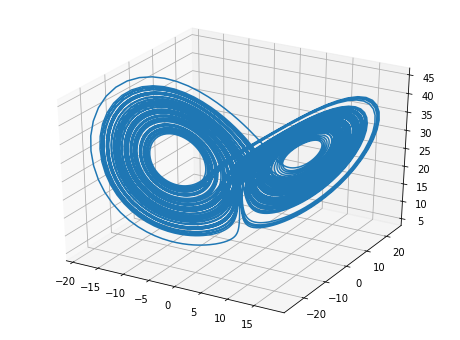

In [10]:
#---- Plotting Lorentz atractor

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(sol_L[:,0], sol_L[:,1], sol_L[:,2])

In [18]:
Lorentz = np.array((sol_L[:,0], sol_L[:,1], sol_L[:,2]))
dim_L = 3
#--- first set r manually
r_L = np.arange(25, 30, 0.1)

#--- set number of points N
N_L = 100

#--- Calculate C_r
Lorentz_Cr = Total_C_r(Lorentz, r_L, N_L, dim_L)

la dimensión de correlación será:  0.8426833441354541


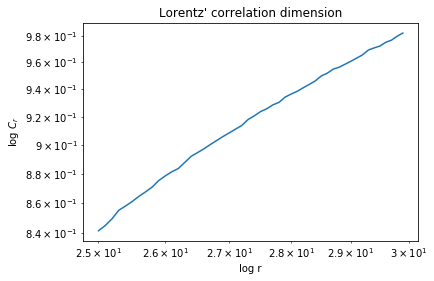

In [19]:
#--- Plot the resulting curve and fit
coef_L = np.polyfit(np.log(r_L), np.log(Lorentz_Cr), 1)
print("la dimensión de correlación será: ", coef_L[0])


plt.loglog(r_L, Lorentz_Cr)
plt.ylabel(r'log $C_r$')
plt.xlabel("log r")
plt.title("Lorentz' correlation dimension")
plt.grid()
plt.show()